In [207]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from pandas_profiling import ProfileReport

sns.set()

In [208]:
df = pd.read_csv('clean_TripAdvisor.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           2790 non-null   object 
 1   Type           2769 non-null   object 
 2   Reviews        2790 non-null   float64
 3   No_of_Reviews  2790 non-null   int64  
 4   Menu           2790 non-null   object 
 5   Price_Range    2790 non-null   object 
 6   Vegan          2790 non-null   bool   
 7   Vegetarian     2790 non-null   bool   
dtypes: bool(2), float64(1), int64(1), object(4)
memory usage: 136.4+ KB


In [209]:
df.head()

,Name,Type,Reviews,No_of_Reviews,Menu,Price_Range,Vegan,Vegetarian
0,Betty Lou's Seafood and Grill,"Seafood, Vegetarian Friendly, Vegan Options",4.5,243,Check The Website for a Menu,Medium,True,True
1,Coach House Diner,"Diner, American, Vegetarian Friendly",4.0,84,Check The Website for a Menu,Medium,False,True
2,Table Talk Diner,"American, Diner, Vegetarian Friendly",4.0,256,http://tabletalkdiner.com/menu/breakfast/,Medium,False,True
3,Sixty Vines,"American, Wine Bar, Vegetarian Friendly",4.5,235,https://sixtyvines.com/menu/plano-tx/,Medium,False,True
4,The Clam Bar,"American, Bar, Seafood",4.0,285,Check The Website for a Menu,Medium,False,False


In [210]:
print(df.columns)
df.describe()

Index(['Name', 'Type', 'Reviews', 'No_of_Reviews', 'Menu', 'Price_Range',
       'Vegan', 'Vegetarian'],
      dtype='object')


,Reviews,No_of_Reviews
count,2790.000000,2790.000000
mean,4.325986,302.322581
std,0.271621,407.759069
min,3.500000,5.000000
25%,4.000000,90.000000
50%,4.500000,188.000000
75%,4.500000,342.000000
max,5.000000,5448.000000


In [211]:
profile = ProfileReport(df, title="TripAdvisor Restaurant Review Profile Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Distribution of Reviews & No_of_Reviews

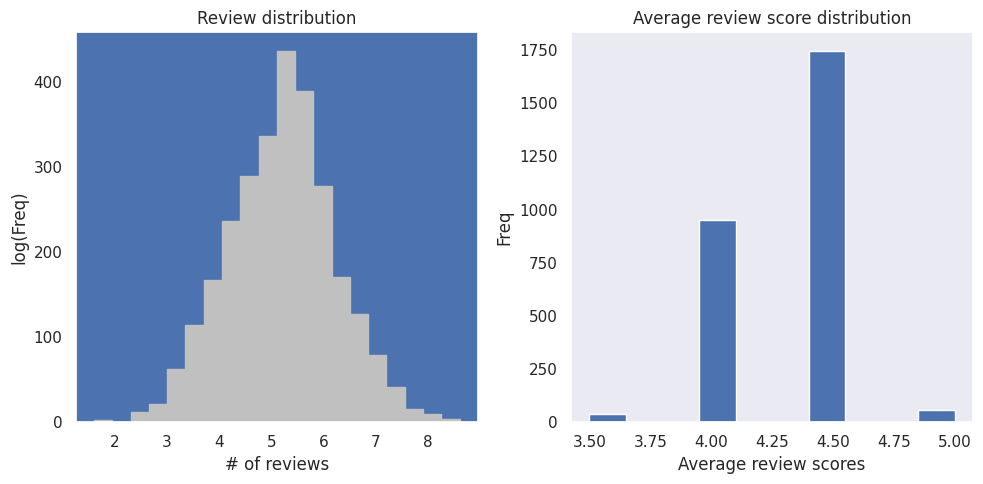

In [225]:
no_of_reviews = np.log(df.No_of_Reviews)
reviews = df.Reviews

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(x=no_of_reviews, bins=20, color='silver', edgecolor='silver')
axs[0].grid(False)
axs[0].set_facecolor('b')
axs[0].set_title('Review distribution')
axs[0].set_xlabel('# of reviews')
axs[0].set_ylabel('log(Freq)')

axs[1].hist(x=reviews, bins=10)
axs[1].grid(False)
axs[1].set_title('Average review score distribution')
axs[1].set_xlabel('Average review scores')
axs[1].set_ylabel('Freq')

plt.tight_layout()
plt.show()

The number of Restaurants with and without vegetarian options are almost equal, so we perform an ANOVA of 'Vegetarian' column's effect on the 'Reviews' column

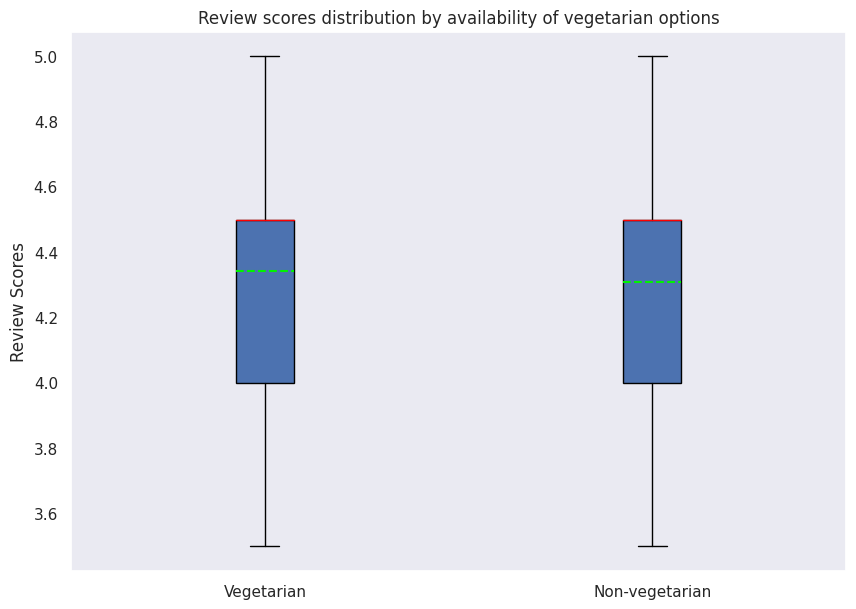

In [213]:
vegetarian_revs = df[df.Vegetarian]['Reviews']
non_vegetarian_revs = df[~df.Vegetarian]['Reviews']

plt.figure(figsize=(10, 7))
plt.boxplot([vegetarian_revs, non_vegetarian_revs],
  labels=['Vegetarian', 'Non-vegetarian'],
  patch_artist=True,
  showmeans=True,
  meanline=True,
  meanprops={'color': '#00f300', 'linewidth': 1.5, 'linestyle': 'dashed'},
  medianprops={'color': '#ff0000'}
)
plt.ylabel('Review Scores')
plt.title('Review scores distribution by availability of vegetarian options')
plt.grid(False)
plt.show()

In [214]:
f_oneway(vegetarian_revs, non_vegetarian_revs)

F_onewayResult(statistic=10.839268864090789, pvalue=0.001006096280044893)

With p-value < 0.05, we can say with 95% confidence that availability of vegetarian options does affect the average review scores of a restaurant.

For two-way ANOVA, we can see the effect of 'Price_Range' and 'Vegan' columns together on 'No_of_Reviews'

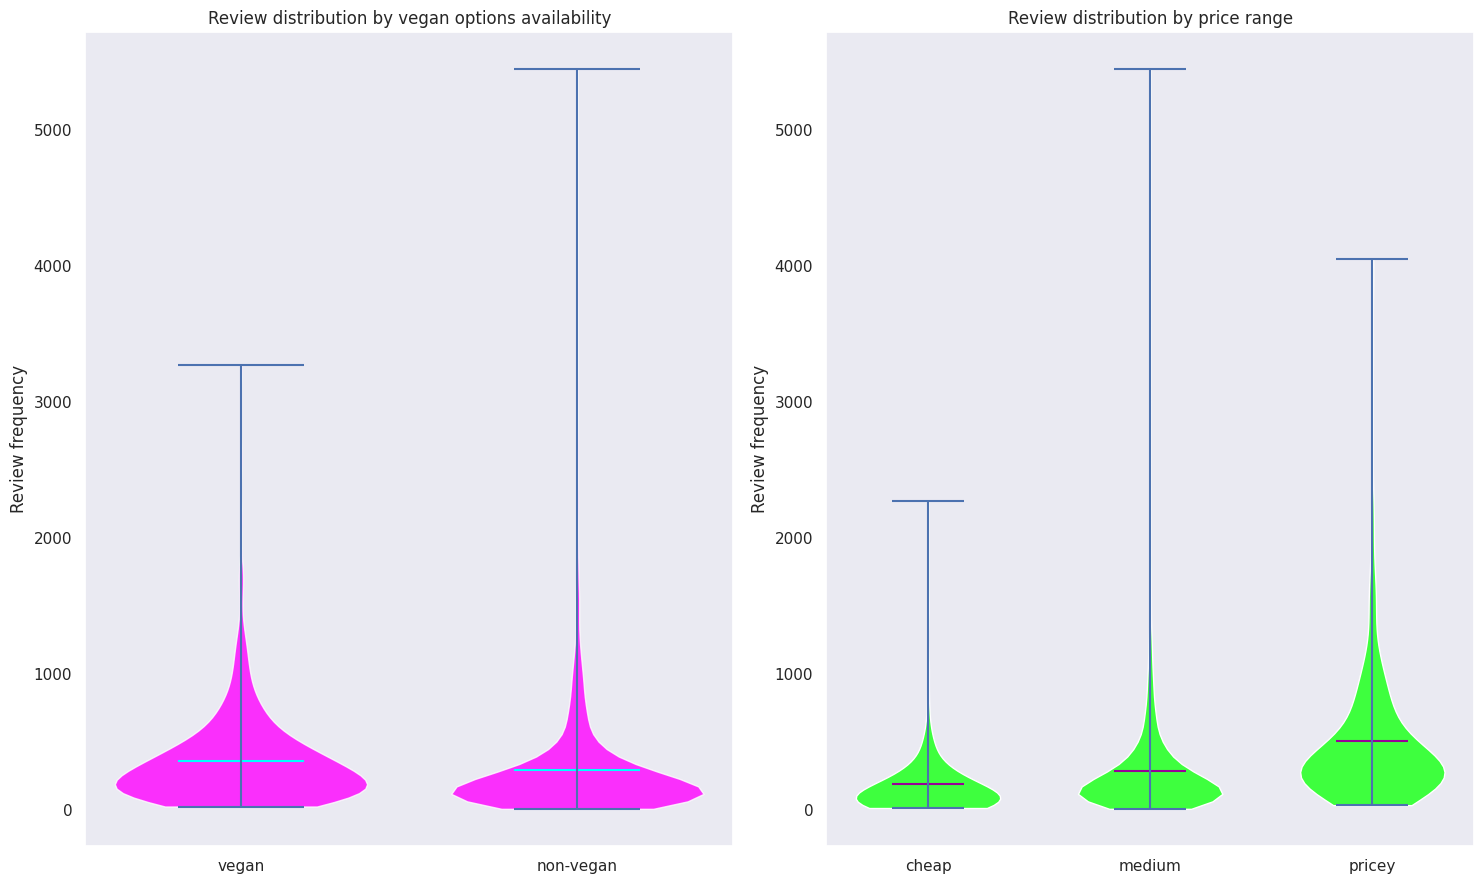

In [215]:
vegan_revf = df[df.Vegan]['No_of_Reviews']
non_vegan_revf = df[~df.Vegan]['No_of_Reviews']

cheap_revf = df[df.Price_Range == 'Cheap']['No_of_Reviews']
med_revf = df[df.Price_Range == 'Medium']['No_of_Reviews']
pricey_revf = df[df.Price_Range == 'Pricey']['No_of_Reviews']

fig, axs = plt.subplots(1, 2, figsize=(15, 9))

parts0 = axs[0].violinplot(dataset=[vegan_revf, non_vegan_revf],
  widths=[.75, .75],
  showmeans=True
)
axs[0].set_xticks(np.arange(1, 3, 1), ['vegan', 'non-vegan'])
axs[0].grid(False)
for pc in parts0['bodies']:
  pc.set_facecolor('magenta')
  pc.set_alpha(0.8)
parts0['cmeans'].set_color('cyan')
axs[0].set_ylabel('Review frequency')
axs[0].set_title('Review distribution by vegan options availability')

parts1 = axs[1].violinplot(dataset=[cheap_revf, med_revf, pricey_revf],
  positions=range(1, 4),
  widths=[.65, .65, .65],
  showmeans=True
)
axs[1].set_xticks(np.arange(1, 4, 1), ['cheap', 'medium', 'pricey'])
axs[1].grid(False)
for pc in parts1['bodies']:
  pc.set_facecolor('#3eff3e')
  pc.set_alpha(1)
parts1['cmeans'].set_color('#970097')

axs[1].set_ylabel('Review frequency')
axs[1].set_title('Review distribution by price range')

plt.tight_layout()
plt.show()

Taking the log of 'No_of_Reviews' for a better view at the distribution

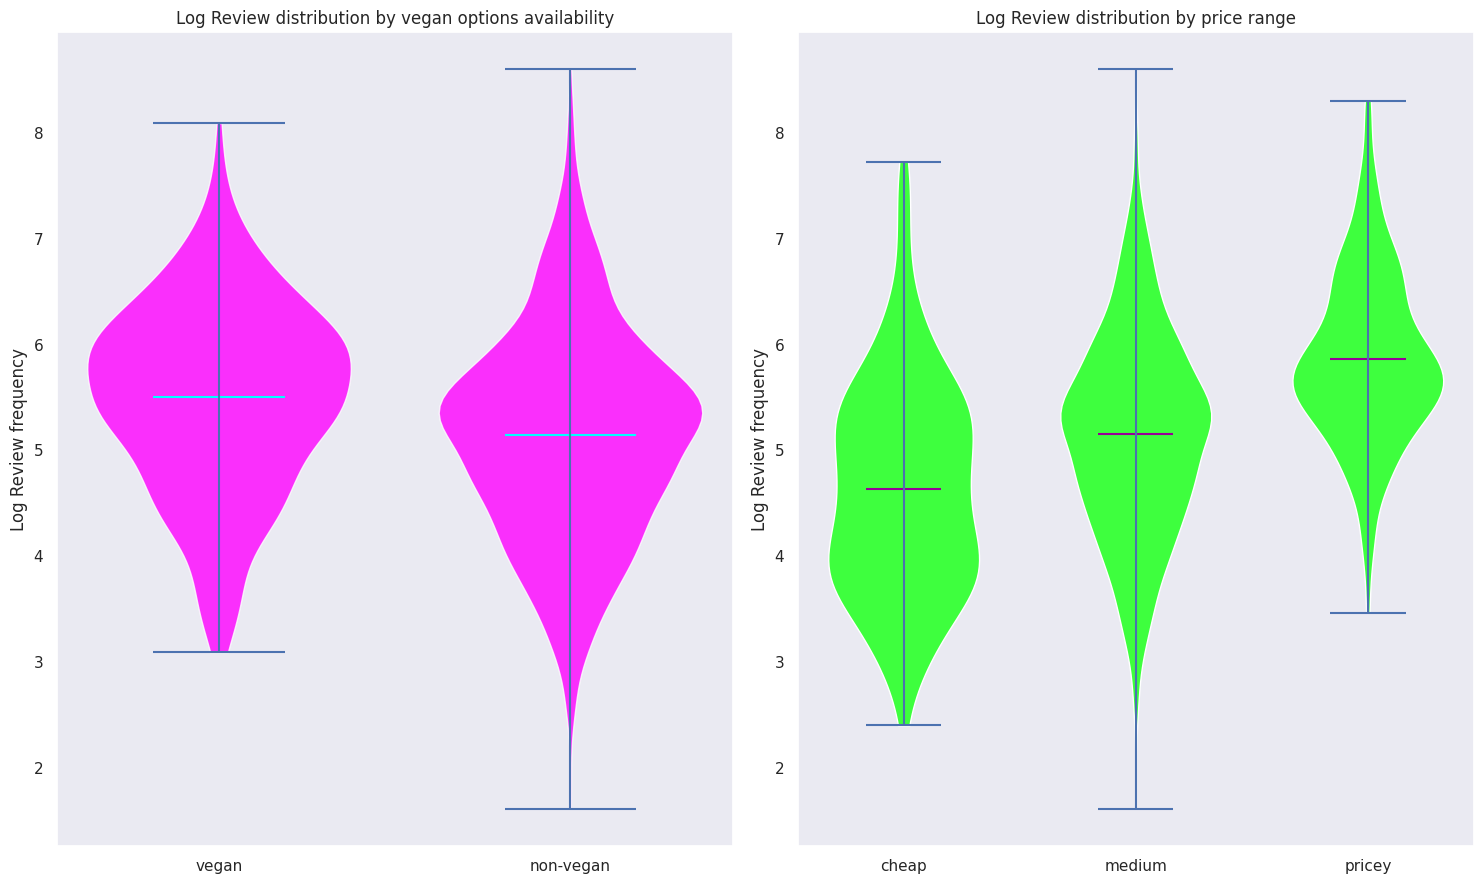

In [216]:
df = df.assign(Log_No_of_Reviews = np.log(df['No_of_Reviews']))

vegan_logrevf = df[df.Vegan]['Log_No_of_Reviews']
non_vegan_logrevf = df[~df.Vegan]['Log_No_of_Reviews']

cheap_logrevf = df[df.Price_Range == 'Cheap']['Log_No_of_Reviews']
med_logrevf = df[df.Price_Range == 'Medium']['Log_No_of_Reviews']
pricey_logrevf = df[df.Price_Range == 'Pricey']['Log_No_of_Reviews']

fig, axs = plt.subplots(1, 2, figsize=(15, 9))

parts0 = axs[0].violinplot(dataset=[vegan_logrevf, non_vegan_logrevf],
  widths=[.75, .75],
  showmeans=True
)
axs[0].set_xticks(np.arange(1, 3, 1), ['vegan', 'non-vegan'])
axs[0].grid(False)
for pc in parts0['bodies']:
  pc.set_facecolor('magenta')
  pc.set_alpha(0.8)
parts0['cmeans'].set_color('cyan')
axs[0].set_ylabel('Log Review frequency')
axs[0].set_title('Log Review distribution by vegan options availability')

parts1 = axs[1].violinplot(dataset=[cheap_logrevf, med_logrevf, pricey_logrevf],
  positions=range(1, 4),
  widths=[.65, .65, .65],
  showmeans=True
)
axs[1].set_xticks(np.arange(1, 4, 1), ['cheap', 'medium', 'pricey'])
axs[1].grid(False)
for pc in parts1['bodies']:
  pc.set_facecolor('#3eff3e')
  pc.set_alpha(1)
parts1['cmeans'].set_color('#970097')

axs[1].set_ylabel('Log Review frequency')
axs[1].set_title('Log Review distribution by price range')

plt.tight_layout()
plt.show()


In [217]:
restaurants_lm = smf.ols('No_of_Reviews ~ C(Vegan) + C(Price_Range) + C(Vegan):C(Price_Range)', data=df).fit()
print(sm.stats.anova_lm(restaurants_lm, typ=2))


                               sum_sq      df          F        PR(>F)
C(Vegan)                 8.002136e+05     1.0   5.017539  2.517043e-02
C(Price_Range)           1.819931e+07     2.0  57.057114  5.185552e-25
C(Vegan):C(Price_Range)  6.676034e+04     2.0   0.209302  8.111630e-01
Residual                 4.440015e+08  2784.0        NaN           NaN


In [218]:
print(restaurants_lm.summary())

                            OLS Regression Results                            
Dep. Variable:          No_of_Reviews   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     24.73
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           1.89e-24
Time:                        21:22:19   Log-Likelihood:                -20668.
No. Observations:                2790   AIC:                         4.135e+04
Df Residuals:                    2784   BIC:                         4.138e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

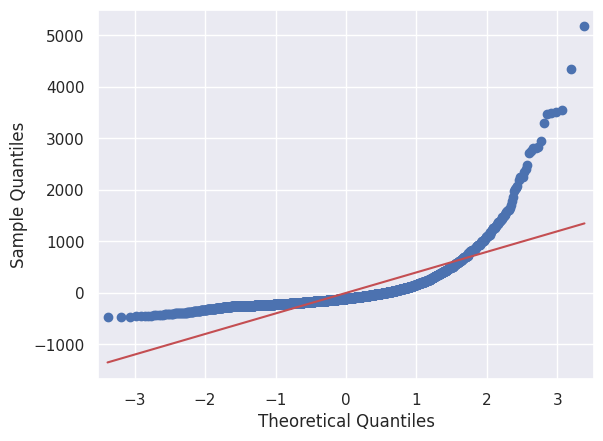

In [219]:
res = restaurants_lm.resid
fig = sm.qqplot(res, line='s')
plt.show()

/tmp/ipykernel_227632/4257632215.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')


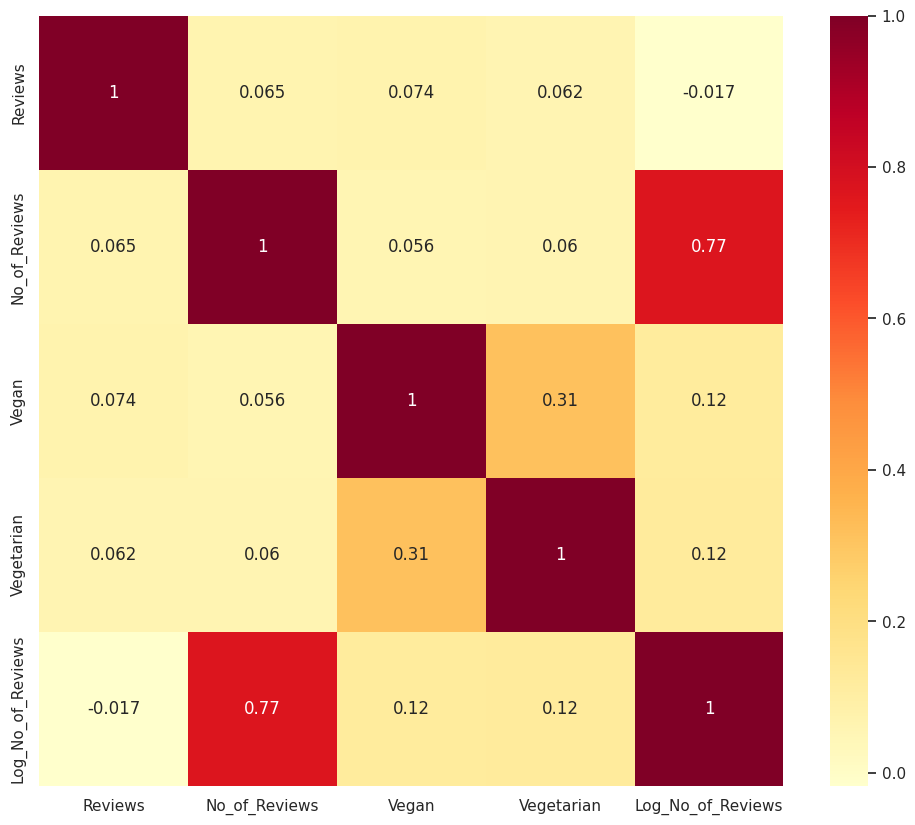

In [220]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

Regression between 'Reviews' & 'No_of_Reviews'

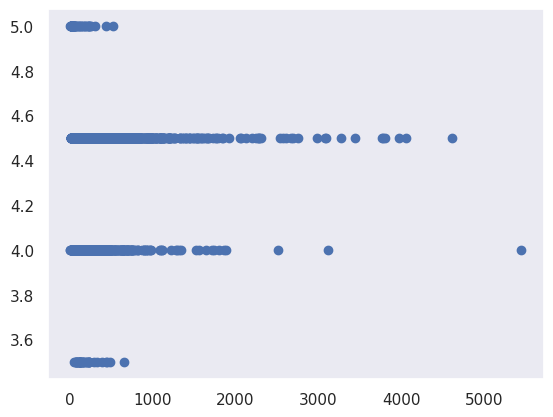

In [231]:
plt.scatter(df['No_of_Reviews'], df['Reviews'])
plt.grid(False)
plt.show()

GLM for predicting 'Vegetarian' by using 'No_of_Reviews'

In [261]:
train = df.iloc[:1700,:][['Vegetarian', 'No_of_Reviews']].astype('int')
test = df.iloc[1700:,:][['Vegetarian', 'No_of_Reviews']].astype('int')

restaurants_glm = smf.glm('Vegetarian ~ No_of_Reviews', data=train, family=sm.families.Binomial()).fit()
restaurants_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Vegetarian   No. Observations:                 1700
Model:                            GLM   Df Residuals:                     1698
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1169.8
Date:                Mon, 19 Dec 2022   Deviance:                       2339.7
Time:                        15:32:26   Pearson chi2:                 1.70e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009787
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1362      0.064     -2.144      0.032      -0.261      -0.012
No_of_Reviews     0.0005      0.000      3.863      0.000       0.000       0.001
=================================================================================
"""

In [262]:
test['Predict_Vegetarian'] = round(restaurants_glm.predict(test)).astype('int')
test

,Vegetarian,No_of_Reviews,Predict_Vegetarian
1700,0,158,0
1701,0,40,0
1702,0,50,0
1703,0,147,0
1704,0,38,0
...,...,...,...
2785,1,376,1
2786,1,198,0
2787,0,211,0
2788,0,87,0


<AxesSubplot: >

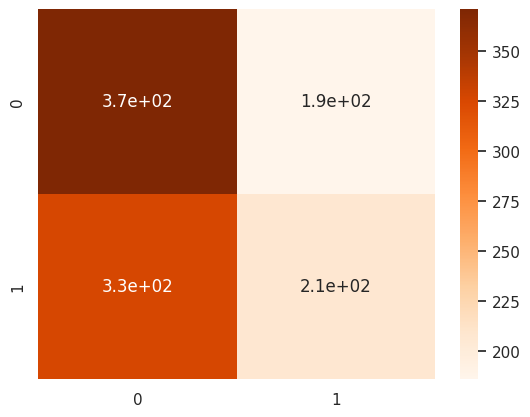

In [263]:
from sklearn.metrics import confusion_matrix

cf_mat = confusion_matrix(test['Vegetarian'], test['Predict_Vegetarian'])
sns.heatmap(cf_mat, annot=True, cmap='Oranges')